In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline

In [2]:
X , y = make_blobs(n_samples=1000,centers=3 , n_features=2 )

In [3]:
X

array([[12.02642356,  9.78376135],
       [ 7.73952352,  8.0113804 ],
       [ 6.39284513, -5.45176175],
       ...,
       [ 5.98111574, -4.80527073],
       [ 5.09322801, -3.90443419],
       [-5.62275171, -7.63800397]], shape=(1000, 2))

In [4]:
y

array([2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2,
       0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0,
       2, 2, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 2, 1,
       2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       0, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0,
       1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2,
       1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2,
       0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1,
       2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2,

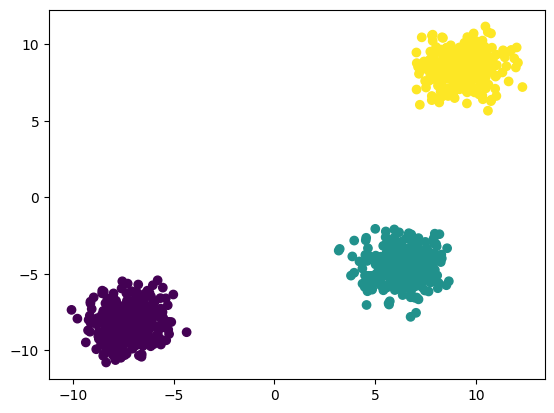

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
# standardizaition - feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 , test_size=0.33)

In [11]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
from sklearn.cluster import KMeans

In [13]:
### Elbow method for selceting the K value 
wcss = []
for k in range(1,20):
    Kmeans=KMeans(n_clusters=k,init="k-means++")
    Kmeans.fit(X_train_scaled)
    wcss.append(Kmeans.inertia_)

In [14]:
wcss

[1340.0000000000002,
 397.895753182995,
 24.040142964709798,
 21.038325648294013,
 18.30903936610654,
 16.597264106734272,
 15.71296724915017,
 12.278239777242302,
 12.26889571303801,
 10.111377390761746,
 9.126927199796233,
 8.14475243629767,
 7.950749800813559,
 7.444490282684413,
 6.882135316305382,
 6.5633872164505505,
 6.146992146896934,
 5.9319627262275505,
 5.395781816884954]

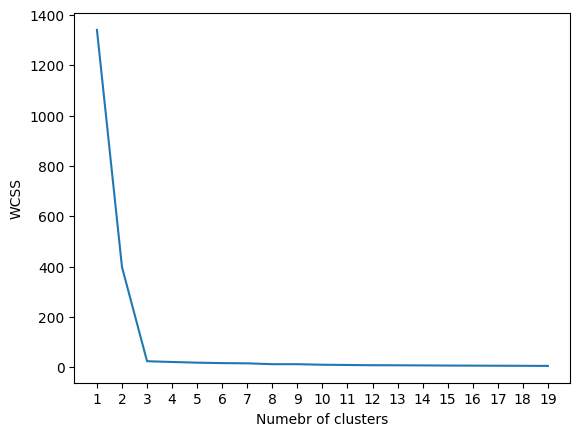

In [17]:
## ploting elbow curve
plt.plot(range(1,20),wcss)
plt.xticks(range(1,20))
plt.xlabel("Numebr of clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:
Kmeans=KMeans(n_clusters=3,init="k-means++")
Kmeans.fit_predict(X_train_scaled)

array([1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2,
       0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 0, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2,
       2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0,
       0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 1,
       2, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2,
       1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1,

In [20]:
y_pred = Kmeans.predict(X_test_scaled)

In [21]:
y_pred

array([2, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 0,
       2, 0, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 0, 0, 1, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1,
       0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0,
       2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 1, 1,
       2, 2, 1, 0, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1,
       0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0,
       2, 0, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0,
       2, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2,
       0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0,

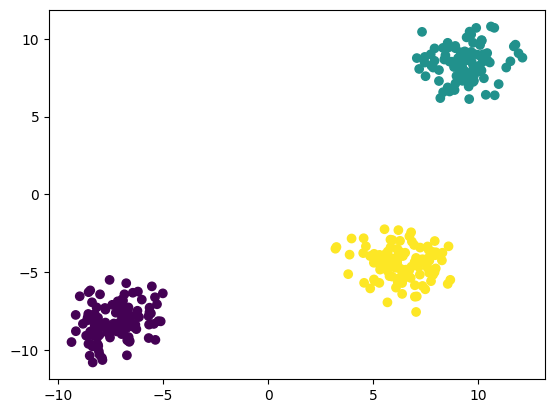

In [22]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
# validating  the k value 
## kneee locator  
## Silhoute scoring

In [23]:
# knee locator
!pip install kneed


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from kneed import KneeLocator

In [28]:
kl =KneeLocator(range(1,20),wcss,curve="convex",direction="decreasing")

In [29]:
kl.elbow

np.int64(3)

In [30]:
# silhoutte scoring
from sklearn.metrics import silhouette_score

In [32]:
silhouette_coffe =[]
for k in range(2,20):
    Kmeans= KMeans(n_clusters=k,init="k-means++")
    Kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled,Kmeans.labels_)
    silhouette_coffe.append(score)

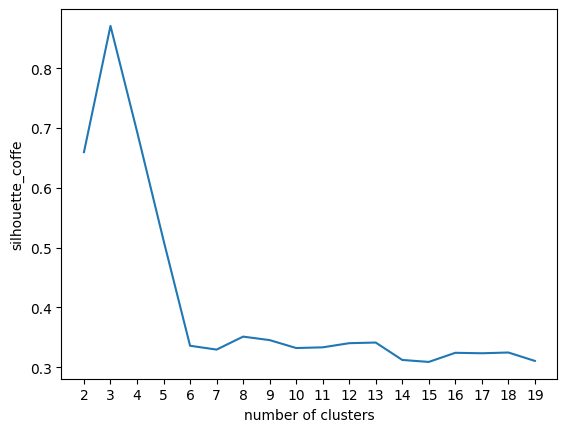

In [33]:
# plotting
plt.plot(range(2,20),silhouette_coffe)
plt.xticks(range(2,20))
plt.xlabel("number of clusters")
plt.ylabel("silhouette_coffe")
plt.show()